# Video Game Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = ".................../Games sales dataset 2024/sales data.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [5]:
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 36.2 MB


In [6]:
df.fillna(0, inplace=True)

### Descriptive Statistics

In [7]:
# Top 10 games by total global sales
games_aggregated = df.groupby('title')['total_sales'].sum()
top_10_titles = games_aggregated.sort_values(ascending=False).head(10)
print(top_10_titles)

title
Grand Theft Auto V                64.29
Call of Duty: Black Ops           30.99
Call of Duty: Modern Warfare 3    30.71
Call of Duty: Black Ops II        29.59
Call of Duty: Ghosts              28.80
Call of Duty: Black Ops 3         26.72
Call of Duty: Modern Warfare 2    25.02
Minecraft                         24.01
Grand Theft Auto IV               22.53
Call of Duty: Advanced Warfare    21.78
Name: total_sales, dtype: float64


In [8]:
# Top 10 games by Critic score
reviews_mean = df.groupby('title')['critic_score'].mean()
top_10_critic_score = reviews_mean.sort_values(ascending=False).head(10)
print(top_10_critic_score)

title
Fusion: Genesis                                                                  10.00
The gamrReview Test Game                                                         10.00
The Legend of Zelda Collector's Edition                                          10.00
Super Mario Odyssey                                                               9.90
Rockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice City     9.75
The Legend of Zelda: A Link to the Past                                           9.70
Super Mario Galaxy 2                                                              9.70
Super Mario Bros. Deluxe                                                          9.70
NFL 2K                                                                            9.70
Super Mario Galaxy                                                                9.70
Name: critic_score, dtype: float64


In [9]:
df.sort_values('critic_score', ascending=False).head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
45707,/games/boxart/full_3980311AmericaFrontccc.jpg,Super Mario Kart,SNES,Racing,Nintendo,Nintendo EAD,10.0,0.00,0.00,0.00,0.00,0.00,1992-09-01,0
19051,/games/boxart/full_final-fight_2AmericaFront.jpg,Final Fight,SNES,Action,Capcom,Capcom,10.0,0.00,0.00,0.00,0.00,0.00,1991-11-10,0
39841,/games/boxart/8972270ccc.jpg,Super Mario Bros.,NES,Platform,Nintendo,Nintendo EAD,10.0,0.00,0.00,0.00,0.00,0.00,1985-10-18,0
24660,/games/boxart/1323877ccc.jpg,The Legend of Zelda: A Link to the Past,SNES,Adventure,Nintendo,Nintendo EAD,10.0,0.00,0.00,0.00,0.00,0.00,1992-04-13,0
32178,/games/boxart/full_minecraft_1AmericaFront.png,Minecraft,PC,Misc,Mojang,Mojang AB,10.0,0.00,0.00,0.00,0.00,0.00,2010-05-10,2018-08-05
54102,/games/boxart/full_renegade-ops_735AmericaFron...,Renegade Ops,XBL,Shooter,Sega,Avalanche Studios,10.0,0.00,0.00,0.00,0.00,0.00,2011-09-14,0
19,/games/boxart/full_1729769AmericaFrontccc.jpg,Grand Theft Auto IV,PS3,Action,Rockstar Games,Rockstar North,10.0,10.57,4.79,0.44,3.73,1.62,2008-04-29,0
27438,/games/boxart/full_9811589AmericaFrontccc.jpg,The Legend of Zelda Collector's Edition,GC,Adventure,Nintendo,Nintendo Software Technology Corporation,10.0,0.00,0.00,0.00,0.00,0.00,2003-11-17,0
1191,/games/boxart/full_red-dead-redemption-undead-...,Red Dead Redemption: Undead Nightmare,PS3,Action,Rockstar Games,Rockstar San Diego,10.0,1.18,0.47,0.06,0.45,0.19,2010-11-23,0
16,/games/boxart/full_1182151AmericaFrontccc.jpg,Grand Theft Auto IV,X360,Action,Rockstar Games,Rockstar North,10.0,11.09,6.80,0.14,3.11,1.04,2008-04-29,0


In [10]:
df['total_sales'].describe()

count    64016.000000
mean         0.103192
std          0.466999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.020000
max         20.320000
Name: total_sales, dtype: float64

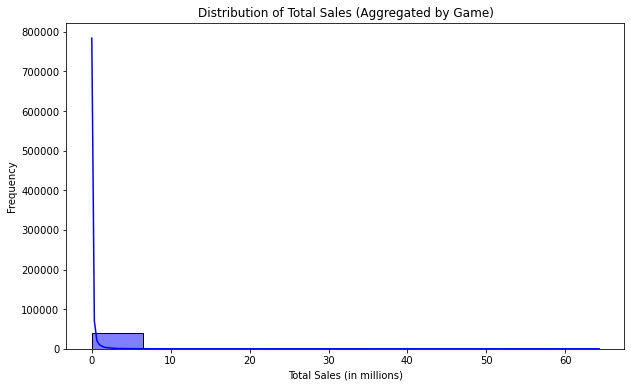

In [11]:
# Distribution of Total Sales

games_aggregated = df.groupby('title')['total_sales'].sum()
aggregated_sales = games_aggregated.sort_values(ascending=False)

aggregated_sales_df = aggregated_sales.reset_index()
aggregated_sales_df.columns = ['title', 'total_sales']  

plt.figure(figsize=(10, 6))
sns.histplot(aggregated_sales_df['total_sales'], bins=10, kde=True, color='blue')
plt.title('Distribution of Total Sales (Aggregated by Game)')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Frequency')
plt.show()


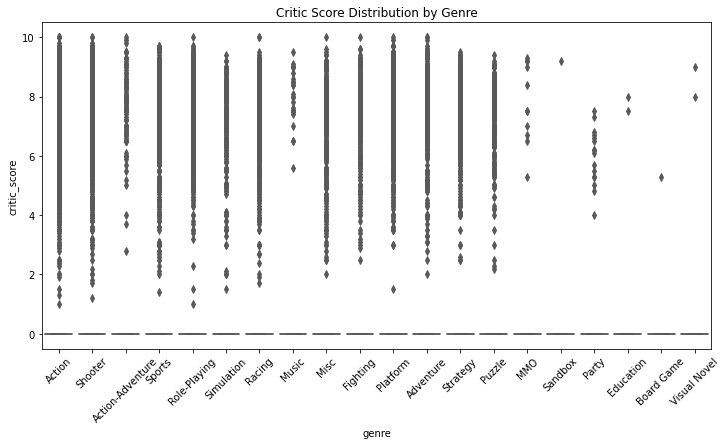

In [12]:
# Distribution of Critic Scores across Genres 
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='critic_score', data=df, palette='Set2')
plt.title('Critic Score Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

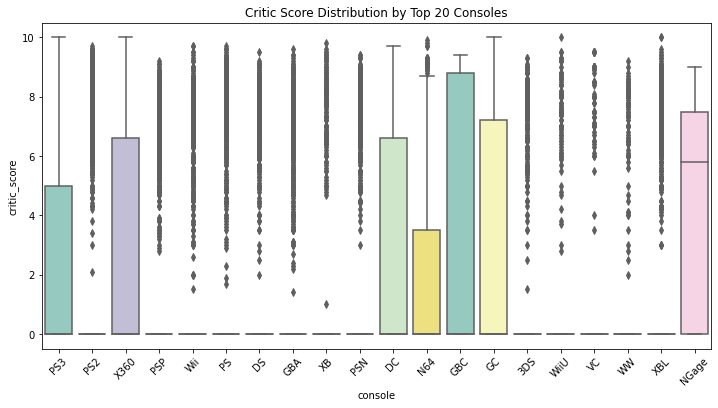

In [13]:
# Distribution of Critic Scores across Consoles

mean_scores = df.groupby('console')['critic_score'].mean().reset_index()

# Sorting the consoles by mean critic_score and get the top 20
top_20_consoles = mean_scores.sort_values(by='critic_score', ascending=False).head(20)['console']

# Filter the original DataFrame to only include the top 20 consoles
df_top_20 = df[df['console'].isin(top_20_consoles)]


plt.figure(figsize=(12, 6))
sns.boxplot(x='console', y='critic_score', data=df_top_20, palette='Set3')
plt.title('Critic Score Distribution by Top 20 Consoles')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Identify Low-Performing Games
low_performers = df[df['total_sales'] <= df['total_sales'].quantile(0.1)]
print("\nLow-Performing Games (Bottom 10% by Sales):")
print(low_performers[['title', 'total_sales']])


Low-Performing Games (Bottom 10% by Sales):
                                              title  total_sales
17570             Zero Escape: Virtue's Last Reward          0.0
17571      Daitoshokan no Hitsujikai: Library Party          0.0
17572                             Cendrillon palikA          0.0
17573  Sanzen Sekai Yuugi: Re Multi Universe Myself          0.0
17574                                       Clannad          0.0
...                                             ...          ...
64011                         XBlaze Lost: Memories          0.0
64012                                  Yoru, Tomosu          0.0
64013                                  Yoru, Tomosu          0.0
64014               Yunohana SpRING! ~Mellow Times~          0.0
64015              Yurukill: The Calumniation Games          0.0

[46446 rows x 2 columns]


In [15]:
# Sales Quartiles

#Aggregating total sales across platforms by game title
games_aggregated = df.groupby('title').agg({
    'total_sales': 'sum',   # Sum up total sales across all platforms
    'genre': 'first',       # Taking the first genre for each game
    'publisher': 'first'    # Taking the first publisher for each game
}).reset_index()

#threshold for the top 25% of sales
top_25_threshold = games_aggregated['total_sales'].quantile(0.75)

#Filter for games in the top 25%
top_25 = games_aggregated[games_aggregated['total_sales'] >= top_25_threshold]

print("\nGames in the Top 25% by Sales (Aggregated Across Platforms):")
print(top_25[['title', 'genre', 'publisher', 'total_sales']].sort_values(by='total_sales', ascending=False))



Games in the Top 25% by Sales (Aggregated Across Platforms):
                                                title         genre  \
13724                              Grand Theft Auto V        Action   
5266                          Call of Duty: Black Ops       Shooter   
5281                   Call of Duty: Modern Warfare 3       Shooter   
5273                       Call of Duty: Black Ops II       Shooter   
5277                             Call of Duty: Ghosts       Shooter   
...                                               ...           ...   
20685                   Metal Saga: Hagane no Kisetsu  Role-Playing   
12514  Future Card Buddyfight Mezase! Buddy Champion!      Strategy   
6560                      Combat Mission: Shock Force      Strategy   
6566          Combat Wings: The Great Battles of WWII    Simulation   
26678                                        Raiden V        Action   

                 publisher  total_sales  
13724       Rockstar Games        64.29  
5

In [16]:
bottom_25_threshold = games_aggregated['total_sales'].quantile(0.25)

#Filter for games in the top 25%
bottom_25 = games_aggregated[games_aggregated['total_sales'] <= bottom_25_threshold]

print("\nGames in the Bottom 25% by Sales (Aggregated Across Platforms):")
print(bottom_25[['title', 'genre', 'publisher', 'total_sales']].sort_values(by='total_sales', ascending=False))


Games in the Bottom 25% by Sales (Aggregated Across Platforms):
                                                   title             genre  \
0                                              "Nuke It"           Shooter   
26588                        Racer Mini Yonku: Japan Cup              Misc   
26601                                        Rack N Ruin         Adventure   
26600                                Racing Team Manager            Racing   
26599                                         Racing Pak            Racing   
...                                                  ...               ...   
12923  Gamics Series Vol. 1: Yokoyama Mitsuteru - San...          Strategy   
12922  Gamics Series Vol. 1: Yokoyama Mitsuteru - San...          Strategy   
12921                              GamesAid: Triple Pack              Misc   
12920                                     Games of Glory           Shooter   
39797                                    レミロア~少女と異世界と魔導書  Action-Adventure   

### Regional Insights

In [17]:
# Sales Contribution by Region
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
region_contribution = df[regions].sum() / df['total_sales'].sum() * 100
print("\nRegional Sales Contribution (%):")
print(region_contribution)


Regional Sales Contribution (%):
na_sales       50.644347
jp_sales       10.414008
pal_sales      29.016895
other_sales     9.856628
dtype: float64


In [18]:
# Regional Preferences
aggregated_data = df.groupby('title').agg({
    'na_sales': 'sum',        # Sum North America sales
    'jp_sales': 'sum',        # Sum Japan sales
    'pal_sales': 'sum',       # Sum Europe sales (PAL)
    'other_sales': 'sum',     # Sum other region sales
    'genre': 'first',         # Take the first genre for each game
    'publisher': 'first'      # Take the first publisher for each game
}).reset_index()

regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']

for region in regions:
    top_games_region = aggregated_data.sort_values(region, ascending=False).head(10)
    
    print(f"\nTop 10 Games in {region.replace('_', ' ').title()} (Aggregated Across Consoles):")
    print(top_games_region[['title', region]])



Top 10 Games in Na Sales (Aggregated Across Consoles):
                                  title  na_sales
13724                Grand Theft Auto V     26.19
5266            Call of Duty: Black Ops     17.65
5281     Call of Duty: Modern Warfare 3     15.57
5277               Call of Duty: Ghosts     15.06
5273         Call of Duty: Black Ops II     14.12
5280     Call of Duty: Modern Warfare 2     13.54
5271          Call of Duty: Black Ops 3     12.82
13719               Grand Theft Auto IV     11.60
13995  Guitar Hero III: Legends of Rock     11.14
5265     Call of Duty: Advanced Warfare     10.66

Top 10 Games in Jp Sales (Aggregated Across Consoles):
                                                   title  jp_sales
15404                                     Hot Shots Golf      4.26
20998                                          Minecraft      2.50
26461                                    R.B.I. Baseball      2.05
11311                        Famista '89 - Kaimaku Han!!      2.05
117

In [19]:
# Genres Preferred in Each Region
for region in regions:
    genre_region = df.groupby('genre')[region].sum().sort_values(ascending=False).head(10)
    print(f"\nMost Popular Genres in {region.replace('_', ' ').title()}:")
    print(genre_region)


Most Popular Genres in Na Sales:
genre
Sports          607.47
Action          589.69
Shooter         528.27
Misc            295.66
Racing          269.72
Platform        187.96
Fighting        173.96
Role-Playing    171.67
Adventure       157.26
Simulation      152.84
Name: na_sales, dtype: float64

Most Popular Genres in Jp Sales:
genre
Role-Playing    130.56
Sports          109.27
Action           80.30
Fighting         58.61
Misc             56.24
Adventure        46.11
Strategy         36.80
Simulation       35.98
Shooter          33.99
Platform         31.08
Name: jp_sales, dtype: float64

Most Popular Genres in Pal Sales:
genre
Action          342.52
Sports          341.92
Shooter         324.74
Racing          179.14
Misc            146.71
Platform         99.39
Adventure        91.52
Role-Playing     91.02
Simulation       86.86
Fighting         79.84
Name: pal_sales, dtype: float64

Most Popular Genres in Other Sales:
genre
Sports          128.19
Action          112.41
Shoote

In [20]:
# Regional Critic Scores
for region in regions:
    avg_critic_score = df[df[region] > 0]['critic_score'].mean()
    print(f"\nAverage Critic Score for Games in {region.replace('_', ' ').title()}: {avg_critic_score:.2f}")


Average Critic Score for Games in Na Sales: 2.11

Average Critic Score for Games in Jp Sales: 1.56

Average Critic Score for Games in Pal Sales: 2.28

Average Critic Score for Games in Other Sales: 2.28


### Console-Specific Analysis

In [21]:
console_sales = df.groupby('console')['total_sales'].sum().sort_values(ascending=False)
print("\nConsole Rankings by Total Sales:")
print(console_sales)


Console Rankings by Total Sales:
console
PS2     1027.76
X360     859.79
PS3      839.70
PS       546.25
PS4      539.92
         ...   
CDi        0.00
CD32       0.00
PS5        0.00
C64        0.00
iQue       0.00
Name: total_sales, Length: 81, dtype: float64


In [22]:
# Exclusive Titles
exclusive_titles = df[df['console'].duplicated(keep=False) == False]
print("\nExclusive Titles and Their Performance:")
print(exclusive_titles[['title', 'console', 'total_sales']])


Exclusive Titles and Their Performance:
                         title console  total_sales
24137                  Pac-Man     FDS          0.0
25038  A Mind Forever Voyaging    C128          0.0
34228                    Elite     Aco          0.0
34229                    Elite    BBCM          0.0


### Release Date Analysis

In [23]:
# Yearly Game Releases and Sales

df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

df_filtered = df[df['release_year'] <= 2018]
yearly_sales = df_filtered.groupby('release_year')['total_sales'].sum()
print("\nYearly Game Releases and Sales:")
print(yearly_sales)



Yearly Game Releases and Sales:
release_year
1970      6.59
1971      0.00
1973      0.00
1975      0.00
1977      2.50
1978      2.36
1979      0.31
1980      2.26
1981      7.73
1982     28.99
1983     22.68
1984      4.85
1985      2.19
1986     10.35
1987      5.59
1988      8.73
1989      9.12
1990      9.07
1991      6.05
1992      9.38
1993     20.16
1994     36.85
1995     52.98
1996    101.36
1997    105.89
1998    132.23
1999    169.61
2000    171.12
2001    226.75
2002    314.50
2003    300.89
2004    284.68
2005    313.48
2006    244.42
2007    436.39
2008    538.11
2009    495.36
2010    454.02
2011    440.32
2012    285.47
2013    266.00
2014    292.11
2015    230.45
2016    208.02
2017    191.96
2018    148.03
Name: total_sales, dtype: float64


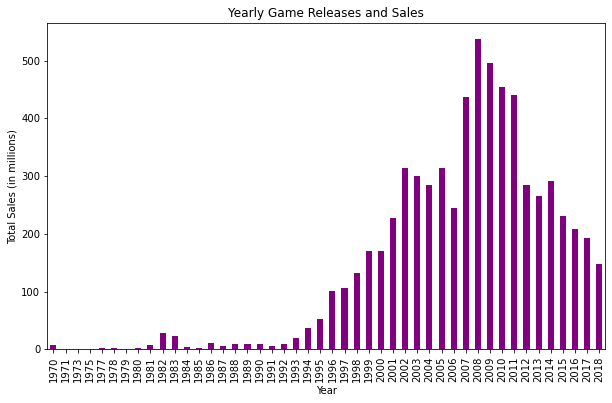

In [24]:
# Visualization
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='purple')
plt.title('Yearly Game Releases and Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.show()

### Critic Score Analysis

In [25]:
# Correlation between Scores and Sales
correlation = df['critic_score'].corr(df['total_sales'])
print(f"\nCorrelation between Critic Score and Total Sales: {correlation:.2f}")


Correlation between Critic Score and Total Sales: 0.28


### Genre Trends

In [26]:
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("\nGenre Rankings by Total Sales:")
print(genre_sales)


Genre Rankings by Total Sales:
genre
Sports              1187.51
Action              1125.89
Shooter              995.50
Misc                 557.79
Racing               525.75
Role-Playing         426.80
Platform             349.15
Fighting             341.13
Adventure            325.39
Simulation           300.65
Action-Adventure     148.52
Puzzle               127.28
Strategy             118.31
Music                 51.75
MMO                    9.31
Party                  6.21
Visual Novel           5.78
Sandbox                1.89
Education              0.97
Board Game             0.33
Name: total_sales, dtype: float64


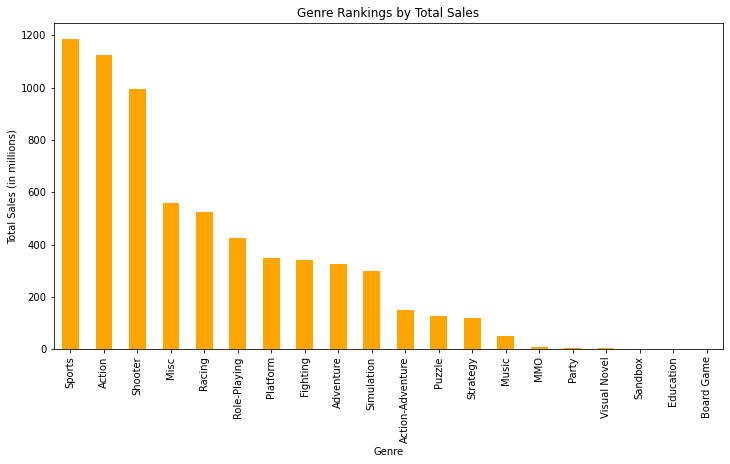

In [27]:
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='orange')
plt.title('Genre Rankings by Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.show()

### Publisher/Developer Insights

In [28]:
publisher_sales = df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False)
print("\nTop Publishers by Total Sales:")
print(publisher_sales.head(10))


Top Publishers by Total Sales:
publisher
Activision                     722.77
Electronic Arts                644.13
EA Sports                      485.66
Ubisoft                        462.57
THQ                            320.89
Sony Computer Entertainment    311.08
Rockstar Games                 239.67
Konami                         210.70
Sega                           206.38
Nintendo                       140.80
Name: total_sales, dtype: float64


In [29]:
df.groupby('publisher')['critic_score'].mean().sort_values(ascending=False).head(30)

publisher
Bimboosoft                   9.400000
2D Boy                       9.200000
Psyonix Studios              9.200000
Number None                  9.050000
Mad Monkey Studio            9.000000
Drool                        9.000000
Villa Gorilla                9.000000
Nayantara Studios            8.800000
Sam Barlow                   8.700000
QCF Design                   8.500000
Skydance Interactive         8.500000
Pelfast                      8.500000
Carpe Fulgur                 8.300000
YuPlay                       8.300000
Hidden Path Entertainment    8.250000
Lionhead Studios             8.200000
LDW                          8.200000
Honeyslug                    8.000000
Introversion                 8.000000
Twisted Tree                 8.000000
Maxistentialism              8.000000
Queasy Games                 8.000000
Uber Entertainment           8.000000
Square EA                    7.930769
Hemisphere Games             7.800000
Sarbakan                     7.800000
Te